In this file, we will use gradient descent algorithm with single neuron to solve a linear regression problem.
We will use the wine quality dataset for our linear regression problem.

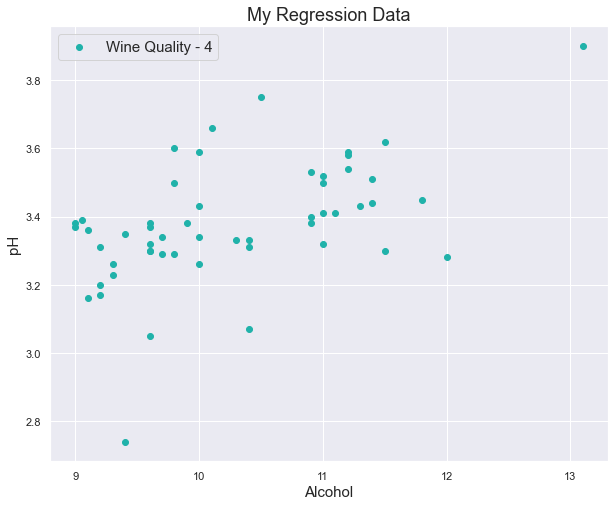

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/winequality-red.csv")
df = df.iloc[10:63][["alcohol", "pH"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.alcohol, 
            df.pH, 
            color = "lightseagreen",
            label = "Wine Quality - 4")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("pH", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

In [18]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)



In [19]:
X = df.alcohol.values
X = X.reshape(-1, 1)
y = df.pH.values

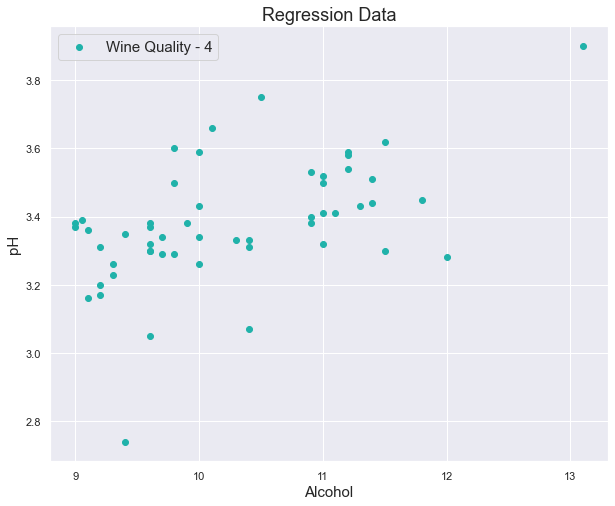

In [20]:
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Wine Quality - 4")
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("pH", fontsize = 15)
plt.title("Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

In [21]:
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.0001, epochs = 5)

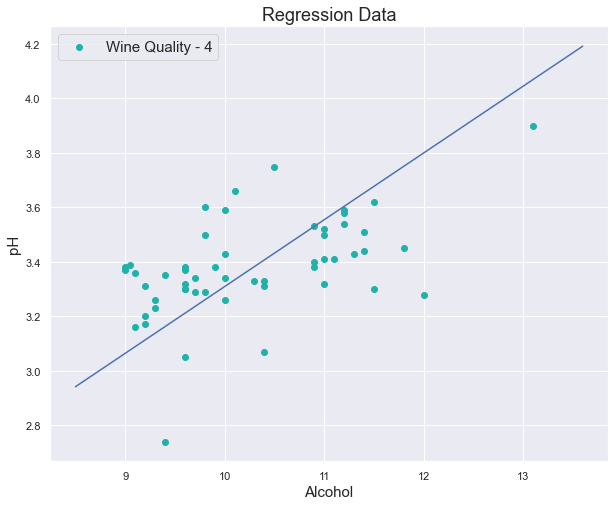

In [22]:
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen", label = "Wine Quality - 4")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("pH", fontsize = 15)
plt.title("Regression Data", fontsize = 18)
plt.legend(fontsize = 15)
plt.show()

Next we see the MSE at each epoch during training.

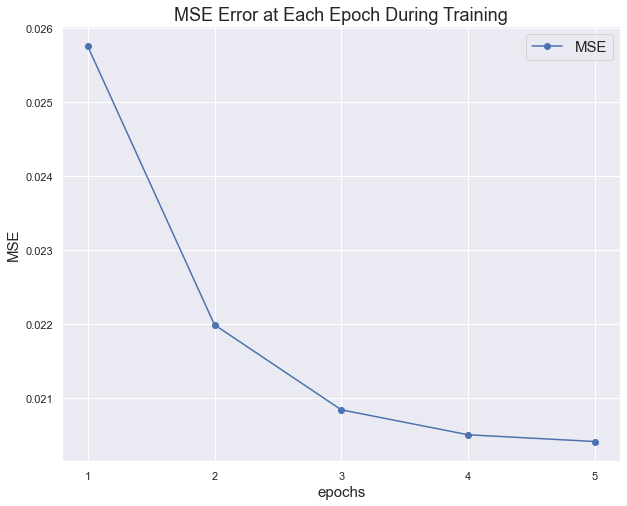

In [23]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

Text(0.5, 1.0, 'MSE Error at Each Epoch During Training')

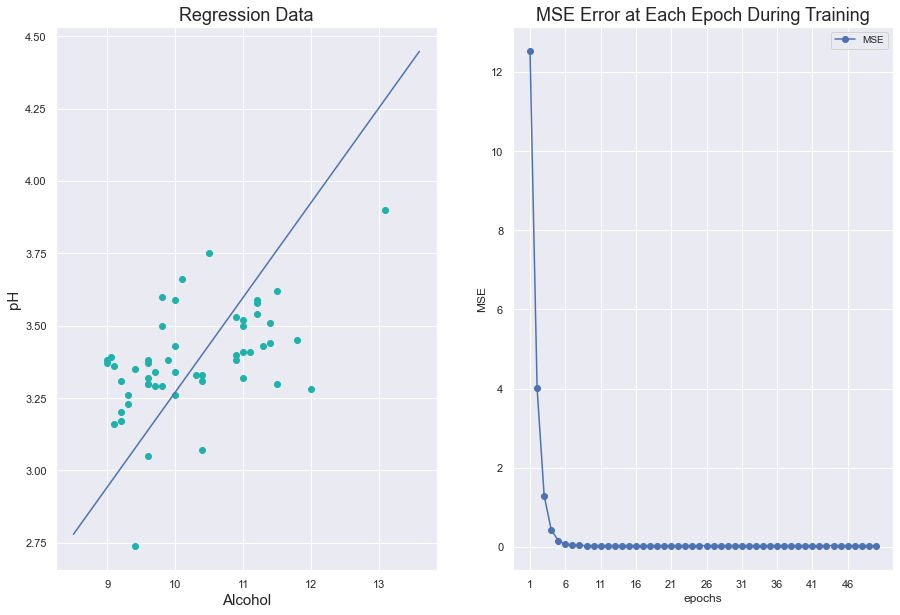

In [24]:
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Alcohol", fontsize = 15)
ax1.set_ylabel("pH", fontsize = 15)
ax1.set_title("Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

Not all points fall on the regression line, so the model did not perform well.

Next, we experiment with different learning rates.

/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000gn/T/ipykernel_18386/3185321125.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000gn/T/ipykernel_18386/3185321125.py:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000gn/T/ipykernel_18386/3185321125.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000gn/T/ipykernel_18386/3185321125.py:49: RuntimeWarning: invalid value encountered in double_scalars
  preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000gn/T/ipykernel_18386/3185321125.py:44: RuntimeWarning: overflow encountered in double_scalars
  errors += .5*((self.predict(xi) - target)**2)
/var/folders/0q/_cj4qt750pn2j9lrb0p30g3w0000

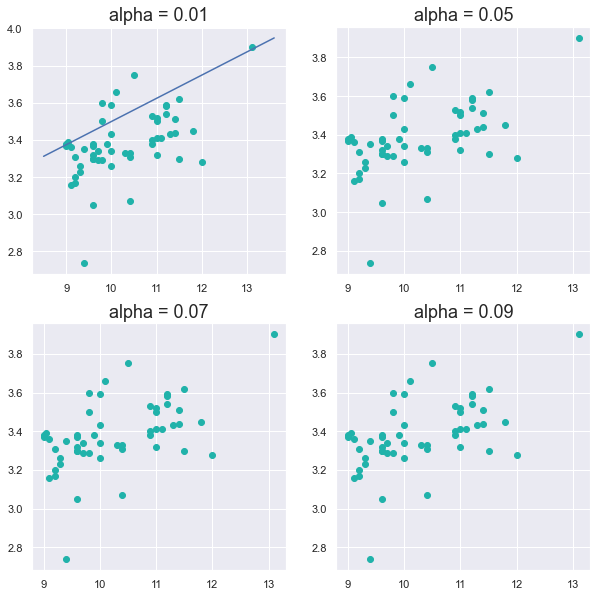

In [25]:
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 1_000)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)